# **Abstract**

Lung cancer is the leading cause of cancer death worldwide, accounting for 1.59 million deaths in 2018. The majority of lung cancer cases are attributed to smoking, but exposure to air pollution is also a risk factor. A new study has found that air pollution may be linked to an increased risk of lung cancer, even in nonsmokers.

This study investigates the assumptions underpinning multinomial logistic regression, a statistical technique extended from binary logistic regression to predict outcomes across multiple categories. The analysis specifically explores two critical assumptions: the absence of multicollinearity among predictors and the linearity of the relationship between predictors and the log odds of the outcomes. To examine these assumptions, the notebook includes a detailed correlation matrix to assess multicollinearity and graphical analyses to investigate the linearity between predictors and log odds. Initial findings suggest that the model does not exhibit multicollinearity, and a linear relationship between predictors and log odds is observed, indicating the assumptions necessary for the effective application of multinomial logistic regression are met. These findings underscore the importance of validating model assumptions to ensure the reliability of prediction outcomes, setting a foundation for further research and application in diverse fields requiring outcome prediction across multiple categories.

# **Dataset**
This dataset contains information on patients with lung cancer, including their age, gender, air pollution exposure, alcohol use, dust allergy, occupational hazards, genetic risk, chronic lung disease, balanced diet, obesity, smoking status, passive smoker status, chest pain, coughing of blood, fatigue levels , weight loss , shortness of breath , wheezing , swallowing difficulty , clubbing of finger nails , frequent colds , dry coughs , and snoring. By analyzing this data we can gain insight into what causes lung cancer and how best to treat it

Age: The age of the patient. (Numeric)
Gender: The gender of the patient. (Categorical)

Air Pollution: The level of air pollution exposure of the patient. (Categorical)

Alcohol use: The level of alcohol use of the patient. (Categorical)

Dust Allergy: The level of dust allergy of the patient. (Categorical)

OccuPational Hazards: The level of occupational hazards of the patient. (Categorical)

Genetic Risk: The level of genetic risk of the patient. (Categorical)

chronic Lung Disease: The level of chronic lung disease of the patient. (Categorical)

Balanced Diet: The level of balanced diet of the patient. (Categorical)

Obesity: The level of obesity of the patient. (Categorical)

Smoking: The level of smoking of the patient. (Categorical)

Passive Smoker: The level of passive smoker of the patient. (Categorical)

Chest Pain: The level of chest pain of the patient. (Categorical)

Coughing of Blood: The level of coughing of blood of the patient. (Categorical)

Fatigue: The level of fatigue of the patient. (Categorical)

Weight Loss: The level of weight loss of the patient. (Categorical)

Shortness of Breath: The level of shortness of breath of the patient. (Categorical)

Wheezing: The level of wheezing of the patient. (Categorical)

Swallowing Difficulty: The level of swallowing difficulty of the patient. (Categorical)

Clubbing of Finger Nails: The level of clubbing of finger nails of the patient. (Categorical)

In [1]:
%pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=db12c02ab9a1d9efafe803048bd266b00c7777963d8e49eef40424c06583140e
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


##Importing required Libraries and H20 Initialization


Automated machine learning (AutoML) simplifies the entire process of applying machine learning to practical challenges by streamlining tasks such as data preprocessing, model training and optimization, and the creation of ensemble models. H2O AutoML, for instance, automates these steps, allowing developers to concentrate on other critical aspects such as data collection, feature engineering, and deploying the model. By handling the complexities of model selection and optimization, AutoML enables more efficient utilization of resources and accelerates the development of high-performing machine learning models.

In [2]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp69150kbm
  JVM stdout: /tmp/tmp69150kbm/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp69150kbm/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_9ekmyx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [5]:
from google.colab import files

uploaded = files.upload()

Saving cancer_patient_dataset.csv to cancer_patient_dataset.csv


#Importing Data

In [27]:
cancer_data = h2o.import_file("cancer_patient_dataset.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [20]:
cancer_data.types

{'index': 'int',
 'Patient Id': 'string',
 'Age': 'int',
 'Gender': 'int',
 'Air Pollution': 'int',
 'Alcohol use': 'int',
 'Dust Allergy': 'int',
 'OccuPational Hazards': 'int',
 'Genetic Risk': 'int',
 'chronic Lung Disease': 'int',
 'Balanced Diet': 'int',
 'Obesity': 'int',
 'Smoking': 'int',
 'Passive Smoker': 'int',
 'Chest Pain': 'int',
 'Coughing of Blood': 'int',
 'Fatigue': 'int',
 'Weight Loss': 'int',
 'Shortness of Breath': 'int',
 'Wheezing': 'int',
 'Swallowing Difficulty': 'int',
 'Clubbing of Finger Nails': 'int',
 'Frequent Cold': 'int',
 'Dry Cough': 'int',
 'Snoring': 'int',
 'Level': 'enum'}

In [21]:
cancer_data.drop('index')

Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High
P102,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
P103,52,2,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
P104,28,2,3,1,4,3,2,3,4,3,1,4,3,1,3,2,2,4,2,2,3,4,3,Low
P105,35,2,4,5,6,5,6,5,5,5,6,6,6,5,1,4,3,2,4,6,2,4,1,Medium
P106,46,1,2,3,4,2,4,3,3,3,2,3,4,4,1,2,4,6,5,4,2,1,5,Medium


In [23]:
# Convert categorical columns to factors

categorical_columns = ['Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring', 'Level']

for col in categorical_columns:
    cancer_data[col] = cancer_data[col].asfactor()

# Verify the conversion
cancer_data.types

{'index': 'int',
 'Patient Id': 'string',
 'Age': 'int',
 'Gender': 'enum',
 'Air Pollution': 'enum',
 'Alcohol use': 'enum',
 'Dust Allergy': 'enum',
 'OccuPational Hazards': 'enum',
 'Genetic Risk': 'enum',
 'chronic Lung Disease': 'enum',
 'Balanced Diet': 'enum',
 'Obesity': 'enum',
 'Smoking': 'enum',
 'Passive Smoker': 'enum',
 'Chest Pain': 'enum',
 'Coughing of Blood': 'enum',
 'Fatigue': 'enum',
 'Weight Loss': 'enum',
 'Shortness of Breath': 'enum',
 'Wheezing': 'enum',
 'Swallowing Difficulty': 'enum',
 'Clubbing of Finger Nails': 'enum',
 'Frequent Cold': 'enum',
 'Dry Cough': 'enum',
 'Snoring': 'enum',
 'Level': 'enum'}

In [24]:
response = "Level"
predictors = list(cancer_data.columns)
predictors.remove('Level')

## **H20 AutoML Execution**

Run AutoML. The max_runtime_secs argument provides a way to limit the AutoML run by time

In [11]:
aml = H2OAutoML(max_runtime_secs=333, seed=1, nfolds = 5)

In [12]:
aml.train(x=predictors, y=response, training_frame = cancer_data)

AutoML progress: |
20:39:46.529: _train param, Dropping bad and constant columns: [Patient Id]

████
20:40:00.880: _train param, Dropping bad and constant columns: [Patient Id]

███
20:40:21.23: _train param, Dropping bad and constant columns: [Patient Id]

██████
20:40:53.481: _train param, Dropping unused columns: [Patient Id]

█
20:40:58.381: _train param, Dropping bad and constant columns: [Patient Id]

█
20:41:04.919: _train param, Dropping bad and constant columns: [Patient Id]

█
20:41:08.7: _train param, Dropping bad and constant columns: [Patient Id]

███████
20:41:43.374: _train param, Dropping bad and constant columns: [Patient Id]

██████
20:42:17.512: _train param, Dropping bad and constant columns: [Patient Id]

████████
20:43:00.373: _train param, Dropping unused columns: [Patient Id]

█
20:43:04.922: _train param, Dropping unused columns: [Patient Id]

█
20:43:09.830: _train param, Dropping bad and constant columns: [Patient Id]


20:43:14.920: _train param, Dropping ba

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_2_AutoML_1_20240219_203946


Model Summary: 
    number_of_trees
--  -----------------
    74

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.0007408008552025649
RMSE: 0.02721765704836779
LogLoss: 0.019574734302629637
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
High    Low    Medium    Error    Rate
------  -----  --------  -------  ---------
365     0      0         0        0 / 365
0       303    0         0        0 / 303
0       0      332       0        0 / 332
365     303    332       0        0 / 1,000

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1

ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.001332719907655658
RMSE: 0.03650643652365509
LogLoss: 0.02568413590547539
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
High    Low    Medium    Error    Rate
------  -----  --------  -------  ---------
365     0      0         0        0 / 365
0       303    0         0        0 / 303
0       0      332       0        0 / 332
365     303    332       0        0 / 1,000

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1

Cross-Validation Metrics Summary: 
                         mean        sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  ----------  -----------  ------------  ------------  ------------  ------------  ------------
accuracy                 1           0            1             1             1             1             1
auc                      nan         0            nan           nan           nan           nan           nan
err                      0           0            0             0             0             0             0
err_count                0           0            0             0             0             0             0
logloss                  0.0256841   0.00115498   0.0248542     0.0257709     0.0276526     0.0251551     0.0249878
max_per_class_error      0           0            0             0             0             0             0
mean_per_class_accuracy  1           0            1             1             1             1             1
mean_per_class_error     0           0            0             0             0             0             0
mse                      0.00133272  0.000139169  0.00117872    0.00134669    0.00154709    0.00134477    0.00124634
pr_auc                   nan         0            nan           nan           nan           nan           nan
r2                       0.998084    0.000210125  0.998314      0.998057      0.997755      0.998089      0.998205
rmse                     0.0364675   0.00188539   0.0343325     0.0366973     0.039333      0.0366711     0.0353035

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_logloss    training_classification_error    training_auc    training_pr_auc
--  -------------------  ----------  -----------------  ---------------  ------------------  -------------------------------  --------------  -----------------
    2024-02-19 20:41:03  5.425 sec   0                  0.66666

**Model Performance**: The XGBoost model has been trained with a substantial number of trees (74), which suggests a complex model that aims to capture the nuances in the data. The Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are very low on both training and cross-validation data, indicating a high level of accuracy in the model's predictions.

**Confusion Matrix**: The confusion matrices provided for both training and cross-validation datasets show perfect classification with no misclassifications among the 'High', 'Low', and 'Medium' categories. This is corroborated by the top-3 hit ratios which are 1.0 for the first, second, and third hits, showing that the model's predictions are consistently accurate.

**Cross-Validation Metrics**: The cross-validation metrics summary reveals an accuracy of 1.0 across different folds, which is highly unusual in practice and suggests that the model is either exceptionally well-tuned to the data or that there is a possibility of data leakage or overfitting.

**Variable Importance**: The model has identified variables such as 'Obesity', 'Wheezing', 'Chest Pain', 'Dust Allergy', 'Passive Smoker', and others as important predictors. 'Obesity' appears to be the most significant predictor with the highest relative importance, which may suggest a strong relationship between this variable and the target variable in the dataset.

**Scoring History**: The scoring history provides an overview of the model's performance over iterations. It shows a decreasing trend in RMSE and logloss as the number of trees increases, which implies that the model's accuracy improves with more trees, up to the final count.

**Possible Concerns**: The perfect metrics such as the mean per-class error of 0.0 and accuracy of 1.0 are extremely rare in real-world data and may indicate overfitting, especially if the model has not been validated on a completely unseen test set. Additionally, the AUC (Area Under the Curve) values being 'nan' could suggest that the AUC was not applicable or not computed for this particular model, possibly due to the nature of the target variable or the configuration of the AutoML run.

**Mean per-class error**
 A mean per-class error of 0 suggests that the models made no mistakes in classification across all classes on the dataset they were trained and validated on. This is an indication of exceptional model performance.

# **Leaderboard**

In [13]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,mean_per_class_error,logloss,rmse,mse
XGBoost_2_AutoML_1_20240219_203946,0,0.0256841,0.0365064,0.00133272
XGBoost_grid_1_AutoML_1_20240219_203946_model_2,0,0.0123835,0.0171657,0.000294661
GBM_5_AutoML_1_20240219_203946,0,2.30926e-16,3.30392e-16,1.09159e-31
GBM_grid_1_AutoML_1_20240219_203946_model_1,0,1.14853e-09,2.40493e-09,5.78369e-18
DeepLearning_grid_1_AutoML_1_20240219_203946_model_5,0,0.000423698,0.000897515,8.05533e-07
StackedEnsemble_BestOfFamily_3_AutoML_1_20240219_203946,0,0.000991165,0.00117998,1.39236e-06
GBM_2_AutoML_1_20240219_203946,0,1.69268e-11,1.79144e-10,3.20926e-20
DRF_1_AutoML_1_20240219_203946,0,8.71942e-05,0.00162338,2.63536e-06
XGBoost_grid_1_AutoML_1_20240219_203946_model_4,0,0.0332474,0.0475881,0.00226462
DeepLearning_grid_1_AutoML_1_20240219_203946_model_3,0,1.28154e-05,6.02563e-05,3.63082e-09


This shows the leaderboard of an AutoML (Automated Machine Learning) process, ranking various models based on their performance metrics. Here are the conclusions drawn from the leaderboard:

**Top Performing Models**: The best-performing models according to the mean per-class error are the XGBoost and Deep Learning models, all of which have a mean per-class error of 0. This suggests that these models are highly effective in classifying the target classes without any average error across all classes.

**RMSE and MSE**: The Root Mean Squared Error (RMSE) and Mean Squared Error (MSE) are metrics that measure the average magnitude of the error in prediction. Here, they are shown to be very low for the top models, suggesting that the predictions are very close to the actual values. The best models according to RMSE and MSE are the GBM and XGBoost models.

**Robust Model Selection**: The consistent performance of XGBoost and Deep Learning models across different metrics suggests that these models are robust for this dataset. However, the selection of the final model should consider not only the error metrics but also factors like model interpretability, computational cost, and ease of deployment.

**Overall Assessment**: The AutoML leaderboard demonstrates highly successful model training with several models achieving near-perfect classification accuracy. Further validation would be necessary to confirm these results and to ensure the chosen model's practical applicability to real-world data


## **Is the relationship significant?**

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


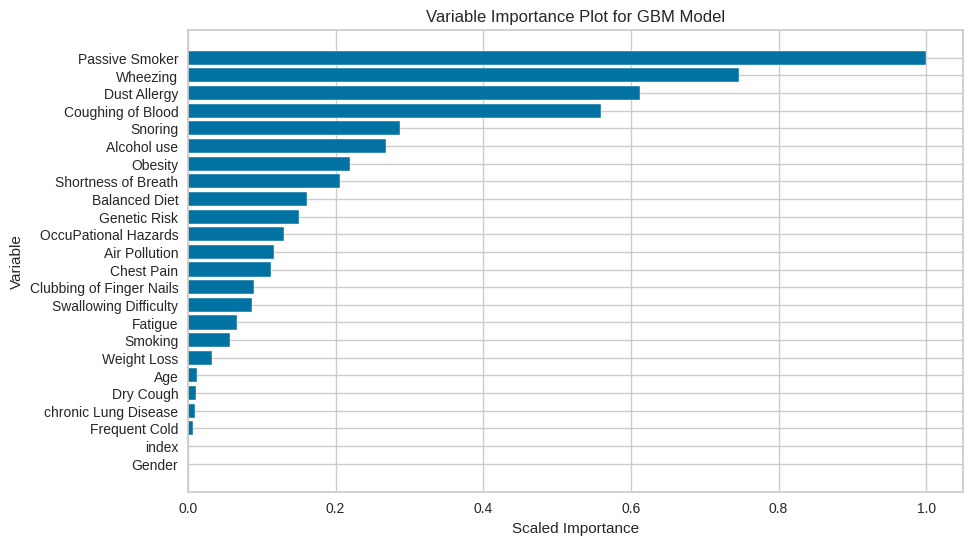

In [14]:
# Get the GBM Model from the leaderboard
model_row = aml.leaderboard.as_data_frame().iloc[2]

# Get model ID from the row
model_id = model_row['model_id']

# Retrieve the GBM model using the model ID
model = h2o.get_model(model_id)

# Retrieve the variable importance
varimp = model.varimp(use_pandas=True)

# Convert varimp dataframe to dictionary for plotting
varimp_dict = dict(zip(varimp['variable'], varimp['scaled_importance']))

# Sort variable importance dictionary by importance values
varimp_sorted = sorted(varimp_dict.items(), key=lambda x: x[1], reverse=True)

# Plot variable importance
plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in varimp_sorted], [x[1] for x in varimp_sorted])
plt.xlabel('Scaled Importance')
plt.ylabel('Variable')
plt.title('Variable Importance Plot for GBM Model')
plt.gca().invert_yaxis()  # Invert y-axis to display variables with highest importance at the top
plt.show()

Variable importance plot for a Gradient Boosting Machine (GBM) model.


**Key Predictors**: The variable **'Passive Smoker'** has the highest importance in the model, suggesting it is the strongest predictor among all the features included in the GBM model for this particular dataset.

**Other Important Variables**: Following 'Passive Smoker', the variables **'Wheezing', 'Dust Allergy', and 'Coughing of Blood'** also have relatively high importance, indicating they are significant contributors to the model's predictions.

**Lesser Importance Variables**: The plot shows that '**Gender', 'Index', 'Frequent Cold', 'Chronic Lung Disease', 'Dry Cough', and 'Age'** have the least importance in the model. This suggests that these variables have less influence on the model's outcome compared to others.

**Model Interpretation**: Understanding which variables are most important can provide insights into the factors that the GBM model is using to make decisions.

## **Are any model assumptions violated?**

Multinomial logistic regression is an extension of binary logistic regression that allows for the prediction of outcomes with more than two categories.
Here are the key assumptions:

1. No multicollinearity
2. Linearity of predictors and log odds
3. Independence of observations

In [99]:
df = pd.read_csv("cancer_patient_dataset.csv")

In [100]:
df = df.drop(['Patient Id', 'index'], axis=1)

**Multicollinearity**

We have a correlation matrix:

In [88]:
df.corr()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,...,0.053006,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,...,-0.146505,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,...,0.607829,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,...,0.667612,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,...,0.625291,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,...,0.645947,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,...,0.632236,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831
chronic Lung Disease,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,...,0.602987,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,...,0.745054,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.814805,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422


**Here we see that it fails the Multicollinearity test**

Highly Correlated Variables: Look for any correlation coefficients greater than 0.7 or less than -0.7 as a general rule of thumb for potential multicollinearity.

OccuPational Hazards and Genetic Risk have a high correlation coefficient of approximately 0.87.


## **Is there any multicollinearity in the model?**

Yes

OccuPational Hazards, Genetic Risk  have a high correlation coefficient of approximately 0.87.

Chronic Lung Disease, Alcohol Use have a high correlation coefficient of approximately 0.81 to 0.85.


## **In the multivariate models are predictor variables independent of all the other predictor variables?**

In the given multivariate models, the predictor variables are not independent of each other. The correlation matrix indicates the presence of multicollinearity, with several pairs of variables displaying high correlation coefficients. The high correlation coefficients among 'Chronic Lung Disease', 'Occupational Hazard', and 'Alcohol Use' suggest a direct relationship between these variables.

In [89]:
X=df.drop('Level',axis=1)

y=df['Level']

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [117]:
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression(solver='liblinear', multi_class='ovr')
Classifier.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [118]:
y_test_hat = Classifier.predict(X_test)

In [119]:
Results = pd.DataFrame({'Actual':y_test,'Predictions':y_test_hat})
Results.head(10)

,Actual,Predictions
507,Medium,Medium
818,Low,Low
452,Medium,Low
368,Low,Low
242,High,High
929,Low,Low
262,Low,Low
810,Low,Medium
318,High,High
49,Low,Low


In [120]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_hat))

0.9333333333333333


To show

###**Linearity of predictors and log odds**
I have plotted a graph between predictor variables and the log odds of the outcome categories. **It shows a linear relationship.**




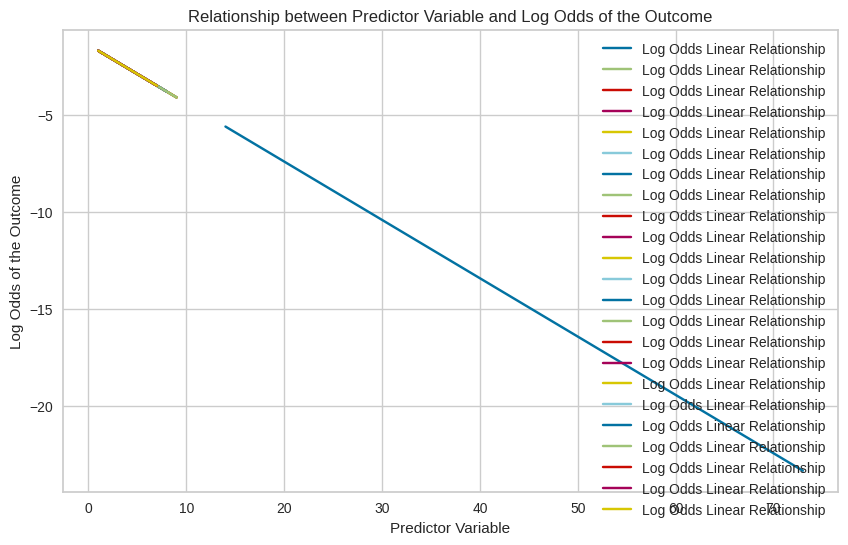

In [95]:

# Obtain the coefficients
intercept = Classifier.intercept_[0]  # β0
coef = Classifier.coef_[0][0]  # β1 for the first (and in this case, only) predictor

# Generate a range of values for the predictor variable
X_range = np.linspace(X_train.min(), X_train.max(), 300)

# Calculate the log odds for each value of X
log_odds = intercept + coef * X_range

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(X_range, log_odds, label='Log Odds Linear Relationship')
plt.xlabel('Predictor Variable')
plt.ylabel('Log Odds of the Outcome')
plt.title('Relationship between Predictor Variable and Log Odds of the Outcome')
plt.legend()
plt.show()


The independence of observations assumption in regression analysis, including multinomial logistic regression, can be assessed visually through various graphical methods like Scatterplots

###**Scatterplots**:
Plotting the predictor variables against the response variables. If there is no apparent pattern or structure in the plot, it suggests that the observations are independent.

Here we see that there is no apparent pattern or structure in this scatter plot. **Therefore we observe that the observations are independent.**

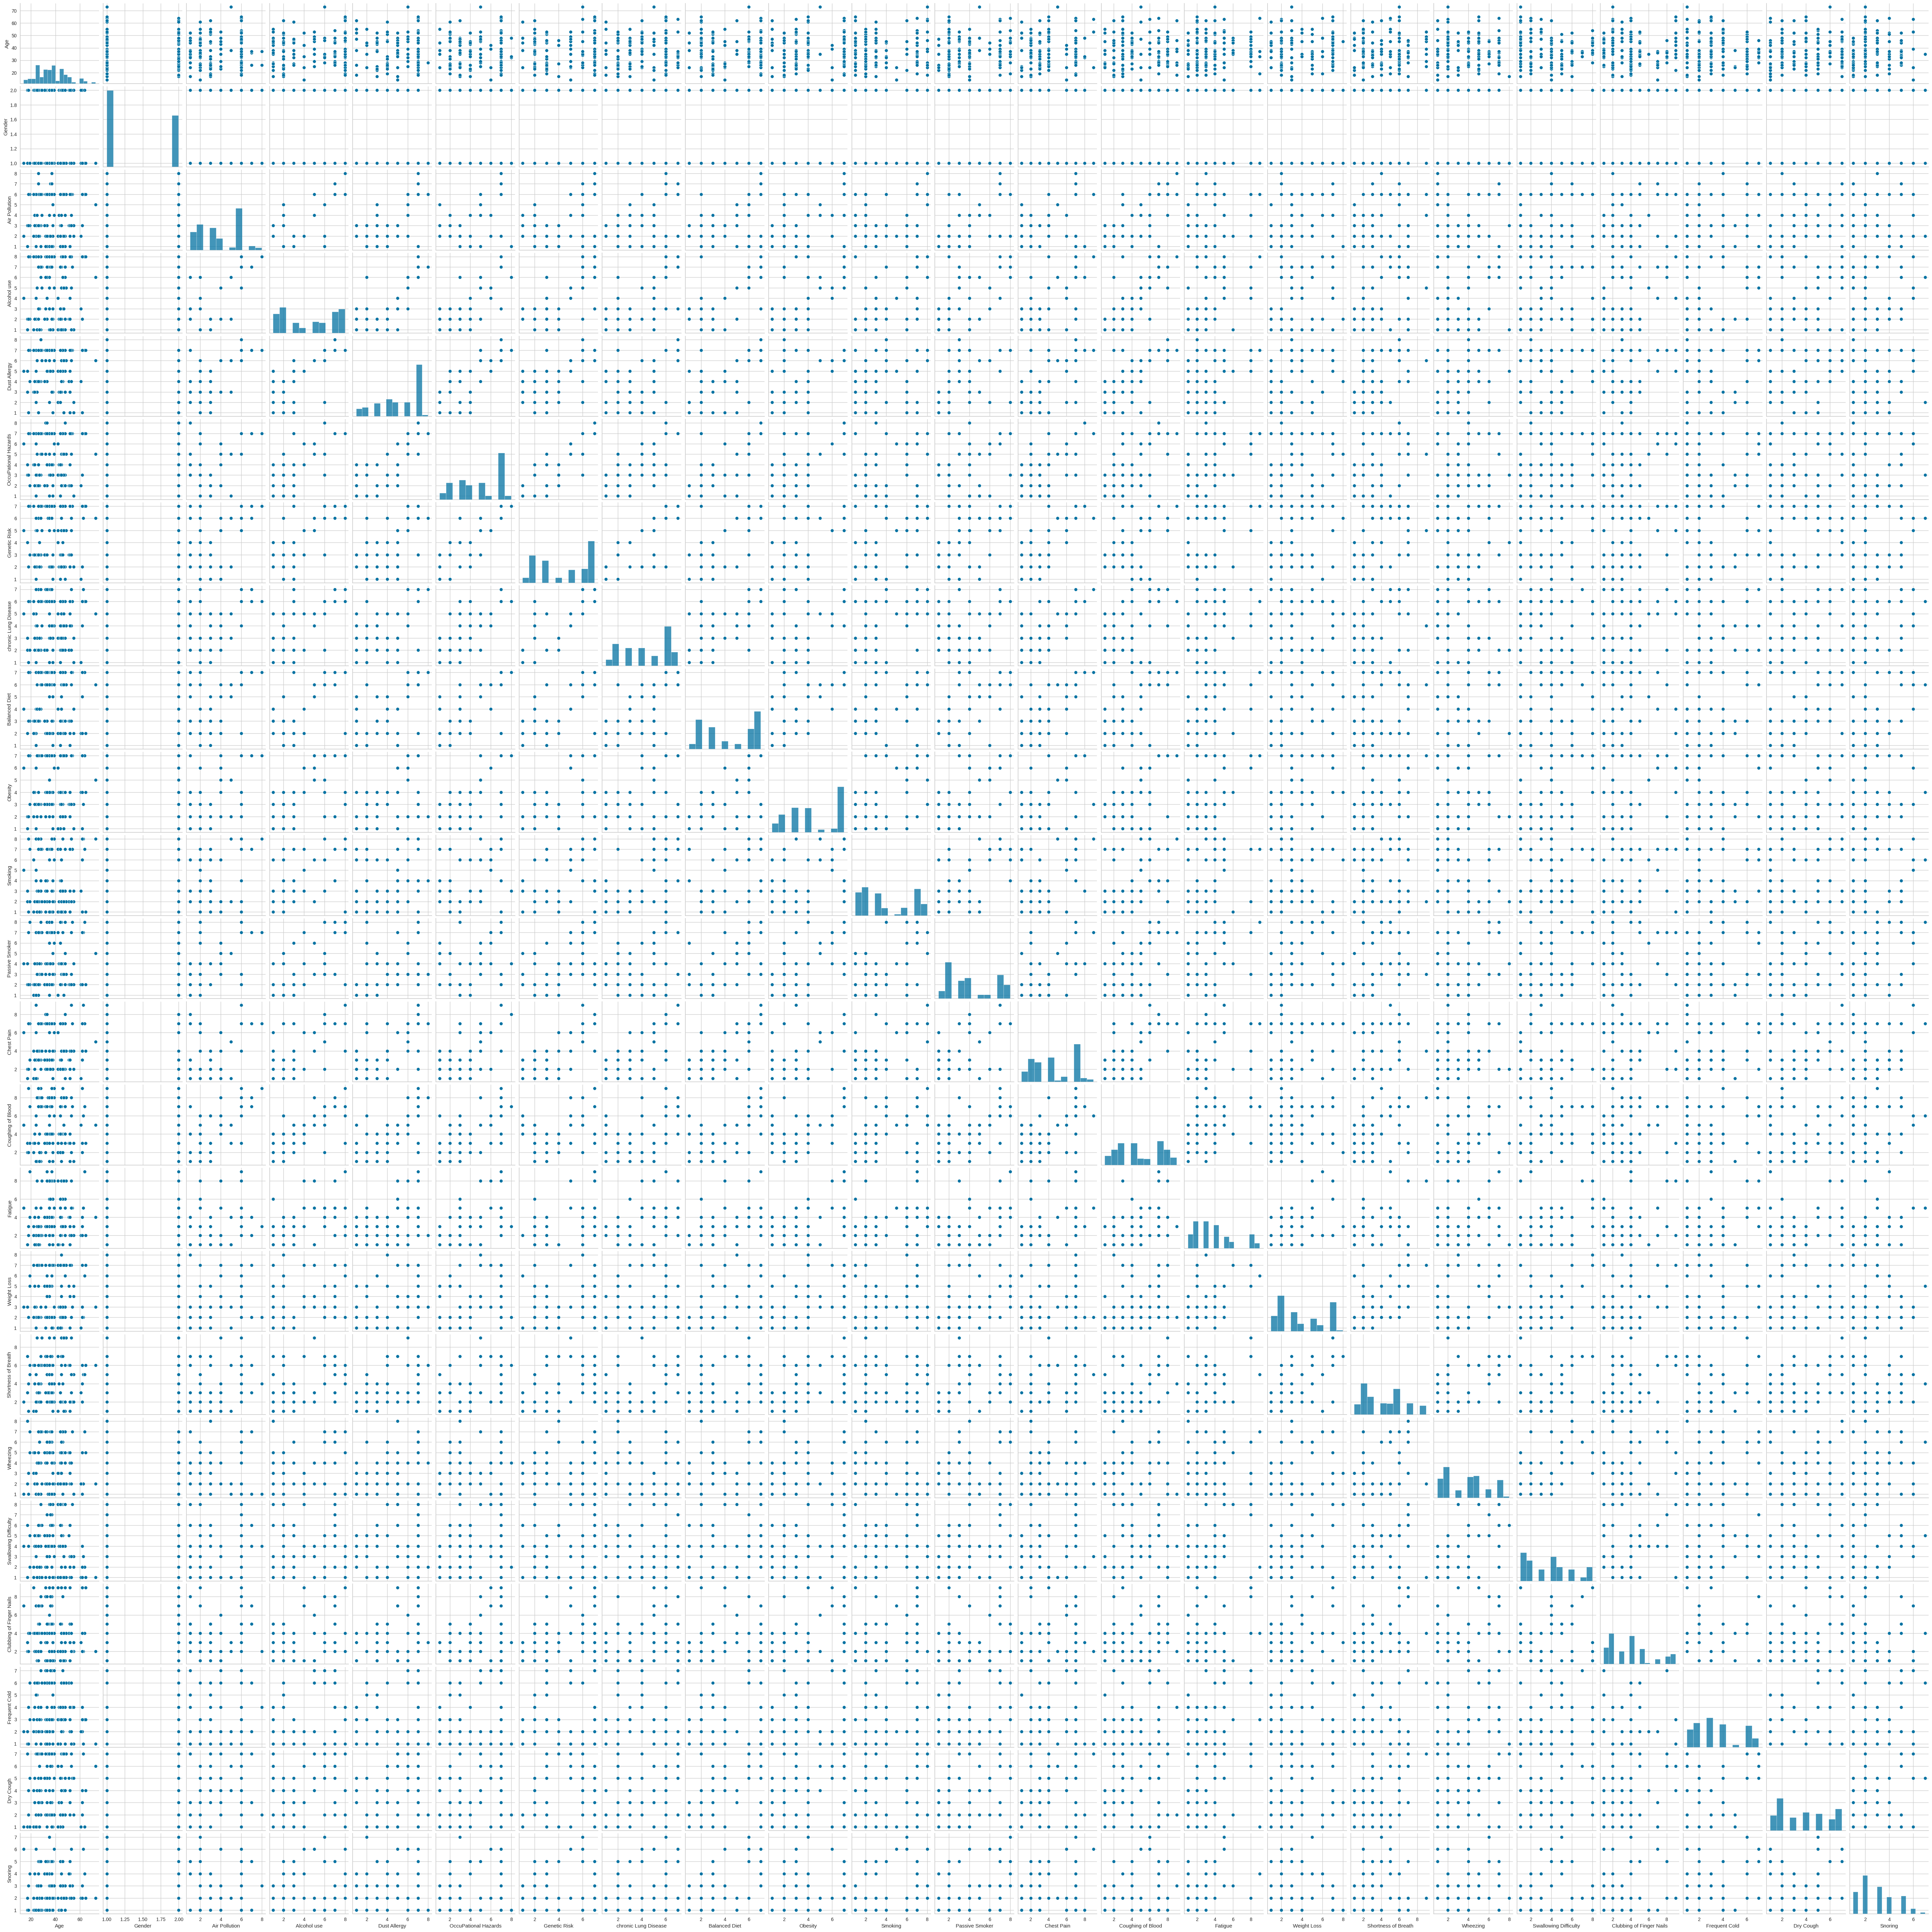

In [97]:
# pair plot to check the colinearity
sns.pairplot(df)

## **In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**



In [104]:
significant_var = [
    'Passive Smoker',
    'Wheezing',
    'Dust Allergy',
    'Coughing of Blood',
    'Snoring',
    'Alcohol use',
    'Obesity',
    'Shortness of Breath',
    'Balanced Diet',
    'Genetic Risk',
    'OccuPational Hazards',
    'Air Pollution',
    'Chest Pain',
    'Clubbing of Finger Nails',
    'Swallowing Difficulty',
    'Fatigue',
    'Smoking',
    'Weight Loss',
    'Age',
    'Dry Cough'
]


X=df[significant_var]

y=df['Level']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [115]:
Classifier = LogisticRegression(solver='liblinear', multi_class='ovr')
Classifier.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [116]:
y_test_hat = Classifier.predict(X_test)
print(accuracy_score(y_test,y_test_hat))

0.9333333333333333


# **Does the model make sense?**

Confusion Matrix:
 [[115   0   0]
 [  0  80   9]
 [  4   7  85]]
Classification Report:
               precision    recall  f1-score   support

        High       0.97      1.00      0.98       115
         Low       0.92      0.90      0.91        89
      Medium       0.90      0.89      0.89        96

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



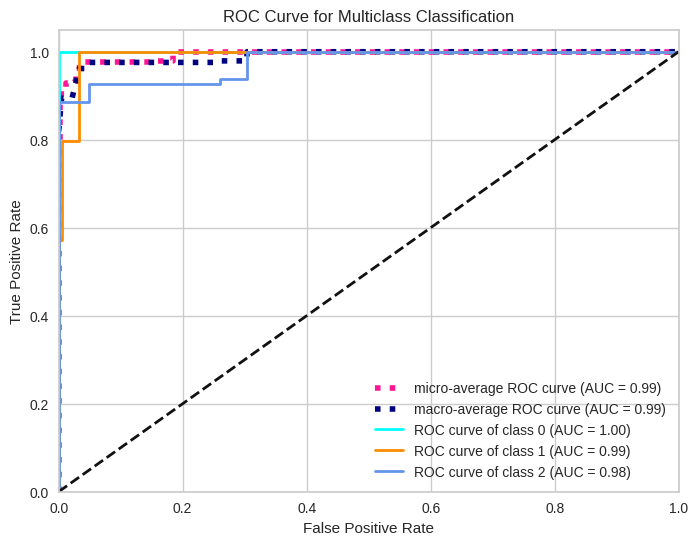

In [127]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Predict probabilities for each class
y_prob = Classifier.predict_proba(X_test)

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_test_hat)
print("Confusion Matrix:\n", conf_mat)

# Print classification report
class_report = classification_report(y_test, y_test_hat)
print("Classification Report:\n", class_report)

# Plot ROC curve
n_classes = len(np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.unique(y))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

Based on the provided confusion matrix, classification report, and ROC curve for multiclass classification

**Confusion Matrix Analysis:**

The model has high accuracy in predicting the 'High' class, with no false positives or false negatives.
There are some misclassifications between the 'Low' and 'Medium' classes, but they are relatively low compared to the correct classifications.
The diagonal elements of the confusion matrix (which represent correct classifications) are significantly higher than the off-diagonal elements (which represent misclassifications).

**Classification Report Metrics:**

The precision for the 'High' class is very high at 0.97, indicating that when the model predicts the 'High' class, it is correct 97% of the time.
The recall for the 'High' class is perfect at 1.00, meaning all instances of the 'High' class were correctly identified.
The F1-scores for all classes are high, indicating a good balance between precision and recall.
Overall accuracy is 0.93, which is quite high and suggests that the model performs well across all classes.

**ROC Curve and AUC Metrics:**

The ROC curves for all classes are well above the diagonal line of no discrimination, indicating good classification performance.
The AUC for all classes is close to 1 (perfect classification), with the 'High' class achieving a perfect score of 1.00.
The micro-average and macro-average ROC AUC scores are both 0.99, which suggests that the model is excellent at distinguishing between classes for individual predictions as well as on average.

**In conclusion, the model appears to be performing well based on the provided outputs and seems to make sense for the problem at hand.**

## **Which hyperparameters are important?**

In [108]:
from sklearn.linear_model import LogisticRegressionCV

# Define a range of alpha values to test
alphas = [0.1, 0.01, 0.001]

# Create a Logistic Regression model with L1 regularization and cross-validation
Classifier_L1_CV = LogisticRegressionCV(penalty='l1', solver='liblinear', Cs=alphas, cv=5)

# Fit the model to the training data
Classifier_L1_CV.fit(X_train, y_train)

# Print the best alpha value found during cross-validation
print("Best alpha:", Classifier_L1_CV.C_[0])

Best alpha: 0.1


In [129]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

# Define a range of alpha values to test
alphas = [0.1, 0.01, 0.001]

# Dictionary to store the mean cross-validation scores for each alpha
alpha_scores = {}

# Perform cross-validation for each alpha
for alpha in alphas:
    # Create a Logistic Regression model with L1 regularization
    model = LogisticRegression(penalty='l1', C=alpha, solver='liblinear')

    # Perform cross-validation and store the mean score
    scores = cross_val_score(model, X_train, y_train, cv=5)
    alpha_scores[alpha] = scores.mean()

# Sort the alphas based on the mean cross-validation score in descending order
sorted_alphas = sorted(alpha_scores.items(), key=lambda item: item[1], reverse=True)

# Print the top alpha values and their mean cross-validation scores
print("Top alpha values:")
for alpha, score in sorted_alphas[:5]:
    print(f"Alpha: {alpha}, Mean CV Score: {score}")


Top alpha values:
Alpha: 0.1, Mean CV Score: 0.9342857142857144
Alpha: 0.01, Mean CV Score: 0.7814285714285715
Alpha: 0.001, Mean CV Score: 0.3485714285714286


## **Does regularization help?**

In [109]:
# Get the best alpha value found during cross-validation
best_alpha = Classifier_L1_CV.C_[0]

# Create a logistic regression model with L1 regularization using the best alpha
Classifier_L1_best_alpha = LogisticRegression(penalty='l1', solver='liblinear', C=best_alpha)

# Fit the model to the training data
Classifier_L1_best_alpha.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_test = Classifier_L1_best_alpha.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy score:", accuracy)

Accuracy score: 0.93


 The accuracy score reported for the test set predictions is 0.93, which is the same before regularization as well.
 ### **Therefore, there is no effect of regularization.**

# **Summary**
The notebook showcases the implementation of logistic regression models, including the use of L1 regularization and cross-validation to identify the best model parameters. It starts with defining a range of alpha values for model testing and proceeds to fit the logistic regression model to the training data, highlighting the process of finding the best alpha value through cross-validation. The concluding parts of the notebook involve predicting labels for the test set using the best alpha value and calculating the accuracy score of the model, thereby demonstrating the practical application of statistical techniques in analyzing and predicting lung cancer risk based on various predictors.

**LICENSE**

MIT License

Copyright (c) 2024 Bharath Bhaskar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:


The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.


THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# **References**   
1.   H20.ai documentation
2.   Kaggle documentation
3.   Sckit learn documentation
4.   Kaggle dataset - https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link
